<h1 style="color: #800000; text-shadow: 2px 2px 4px #FFFF00; border: 1px solid #FFFF00; font-size: 70px; text-align: center; background-color: #129B03;"> 🏠 REAL STATE 🏠 </h1>




<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">00 | First Steps </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm 
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from datetime import datetime
from sklearn import preprocessing


%matplotlib inline
pd.set_option('display.max_columns', None)

<h4 style="color: #129B03;">Other settings</h4>

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)

<h4 style="color: #129B03;">Data Extraction</h4>

In [3]:
data = pd.read_csv("king_ country_ houses_aa.csv")

<h4 style="color: #129B03;">Exploring the Data (First Impression)</h4>

<b>1.</b> <b>id</b>: A unique identifier for a house.<br>
<b>2.</b> <b>date</b>: The date on which the house was sold.<br>
<b>3.</b> <b>price</b>: The sale price of the house (prediction target).<br>
<b>4.</b> <b>bedrooms</b>: Number of bedrooms in the house.<br>
<b>5.</b> <b>bathrooms</b>: Number of bathrooms in the house, per bedroom.<br>
<b>6.</b> <b>sqft_living</b>: Square footage of the interior living space.<br>
<b>7.</b> <b>sqft_lot</b>: Square footage of the land space.<br>
<b>8.</b> <b>floors</b>: Number of floors (levels) in the house.<br>
<b>9.</b> <b>waterfront</b>: Whether the house has a waterfront view.<br>
<b>10.</b> <b>view</b>: Number of times the house has been viewed.<br>
<b>11.</b> <b>condition</b>: The overall condition of the house.<br>
<b>12.</b> <b>grade</b>: The overall grade given to the house, based on the King County grading system.<br>
<b>13.</b> <b>sqft_above</b>: Square footage of the house apart from the basement.<br>
<b>14.</b> <b>sqft_basement</b>: Square footage of the basement.<br>
<b>15.</b> <b>yr_built</b>: The year the house was built.<br>
<b>16.</b> <b>yr_renovated</b>: The year the house was renovated.<br>
<b>17.</b> <b>zipcode</b>: ZIP code area.<br>
<b>18.</b> <b>lat</b>: Latitude coordinate.<br>
<b>19.</b> <b>long</b>: Longitude coordinate.<br>
<b>20.</b> <b>sqft_living15</b>: The interior living space for the nearest 15 neighbors in 2015.<br>
<b>21.</b> <b>sqft_lot15</b>: The land spaces for the nearest 15 neighbors in 2015.<br>
<b>22.</b> <b>TARGET --> Price</b>: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.<br>



In [4]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13693,937000330,20150319T000000,246500.0,3,1.5,1170,11530,1.0,0,0,3,7,1170,0,1960,0,98198,47.4211,-122.290,1550,8605
19508,3472800068,20140717T000000,968000.0,5,2.5,2900,9799,1.0,0,0,3,8,1450,1450,1959,0,98004,47.6255,-122.208,2810,9687
3692,7468900245,20150420T000000,188200.0,3,1.0,1260,7265,1.0,0,0,4,7,1260,0,1954,0,98002,47.2979,-122.224,940,7200
7012,4239400920,20140922T000000,149000.0,3,1.0,1090,2800,1.0,0,0,3,6,1090,0,1969,0,98092,47.3162,-122.183,1040,2960
1989,1180500070,20141124T000000,335000.0,4,2.5,2330,7050,2.0,0,0,3,8,2330,0,1998,0,98178,47.5001,-122.231,1810,5424


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.shape

(21613, 21)

In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h4 style="color: #129B03;">Columns Standardizations</h4>

In [11]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]

<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">01 | Data Cleaning</h1>

<h4 style="color: #129B03;">Data to df</h4>

In [12]:
df = data.copy()

<h4 style="color: #129B03;">Dealing with Data types</h4>

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['date'] = df['date'].apply(lambda x: x.toordinal())

<h4 style="color: #129B03;">Dealing with NaN values</h4>

<h4 style="color: #129B03;">Dealing with Duplicates</h4>

<h4 style="color: #129B03;">Dealing with Empty Spaces</h4>

<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">02 | EDA </h1>

<h4 style="color: #129B03;">Checking unique values</h4>

In [15]:
for column in df.columns[1:]:
    print(f'{column} : {df[column].unique()}')

date : [735519 735576 735654 735647 735365 735411 735613 735703 735669 735691
 735380 735381 735513 735622 735445 735382 735572 735712 735367 735471
 735417 735369 735557 735540 735410 735568 735408 735659 735547 735570
 735397 735597 735642 735404 735429 735456 735421 735534 735443 735432
 735682 735430 735716 735668 735492 735646 735598 735634 735660 735464
 735695 735472 735652 735577 735473 735527 735574 735387 735485 735515
 735470 735396 735488 735603 735394 735424 735673 735542 735708 735393
 735680 735569 735589 735626 735386 735551 735402 735372 735480 735375
 735655 735439 735590 735484 735687 735425 735395 735533 735579 735500
 735690 735376 735437 735662 735661 735561 735558 735407 735606 735729
 735600 735556 735694 735541 735431 735624 735458 735450 735360 735422
 735726 735656 735409 735451 735536 735465 735697 735688 735689 735442
 735452 735550 735509 735666 735457 735575 735648 735681 735389 735355
 735614 735505 735639 735423 735383 735554 735605 735702 735481 735358

In [16]:
for column in df.columns[1:]:
    print(f'{column} : {df[column].nunique()}')

date : 372
price : 4028
bedrooms : 13
bathrooms : 30
sqft_living : 1038
sqft_lot : 9782
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 12
sqft_above : 946
sqft_basement : 306
yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5034
long : 752
sqft_living15 : 777
sqft_lot15 : 8689


<h4 style="color: #129B03;">Droping Columns</h4>

In [17]:
df = df.drop("id", axis=1)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<h4 style="color: #129B03;">Reodering Columns</h4>

In [18]:
column_order = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                'sqft_living15', 'sqft_lot15', 'price']
df = df.reindex(columns=column_order)

<h4 style="color: #129B03;">Selecting Numerical and Categorical</h4>

In [19]:
df = df[df["price"] > 650000]

In [20]:
df.shape

(5207, 20)

In [21]:
numerical = []
categorical = [] 
for column in df.columns:
    if int(df[column].nunique()) > 6:
        numerical.append(column)
    else:
        categorical.append(column)
print(f' numerical : {numerical}')
print(f' categorical : {categorical}')

 numerical : ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
 categorical : ['floors', 'waterfront', 'view', 'condition']


<h4 style="color: #129B03;">Descriptve Statistics</h4>

In [22]:
df1 = df[numerical].describe().T.round(2)
df1

,count,mean,std,min,25%,50%,75%,max
date,5207.0,735533.40,115.15,735355.00,735430.00,735519.00,735648.00,735745.00
bedrooms,5207.0,3.83,0.89,0.00,3.00,4.00,4.00,10.00
bathrooms,5207.0,2.69,0.79,0.00,2.25,2.50,3.25,8.00
sqft_living,5207.0,3020.64,1029.04,890.00,2350.00,2910.00,3523.00,13540.00
sqft_lot,5207.0,21393.73,60677.33,520.00,5400.50,8616.00,14552.00,1651359.00
grade,5207.0,8.87,1.23,5.00,8.00,9.00,10.00,13.00
sqft_above,5207.0,2554.41,985.66,580.00,1770.00,2460.00,3180.00,9410.00
sqft_basement,5207.0,466.23,575.28,0.00,0.00,0.00,890.00,4820.00
yr_built,5207.0,1972.93,32.57,1900.00,1951.00,1981.00,2001.00,2015.00
yr_renovated,5207.0,161.65,545.08,0.00,0.00,0.00,0.00,2015.00


In [23]:
df2 = df[numerical].var().round(2)
df2

date             1.325999e+04
bedrooms         8.000000e-01
bathrooms        6.300000e-01
sqft_living      1.058915e+06
sqft_lot         3.681738e+09
grade            1.500000e+00
sqft_above       9.715328e+05
sqft_basement    3.309477e+05
yr_built         1.060920e+03
yr_renovated     2.971089e+05
zipcode          2.632530e+03
lat              1.000000e-02
long             2.000000e-02
sqft_living15    6.152528e+05
sqft_lot15       1.249244e+09
price            2.307034e+11
dtype: float64

<h4 style="color: #129B03;">Checking Distributions</h4>

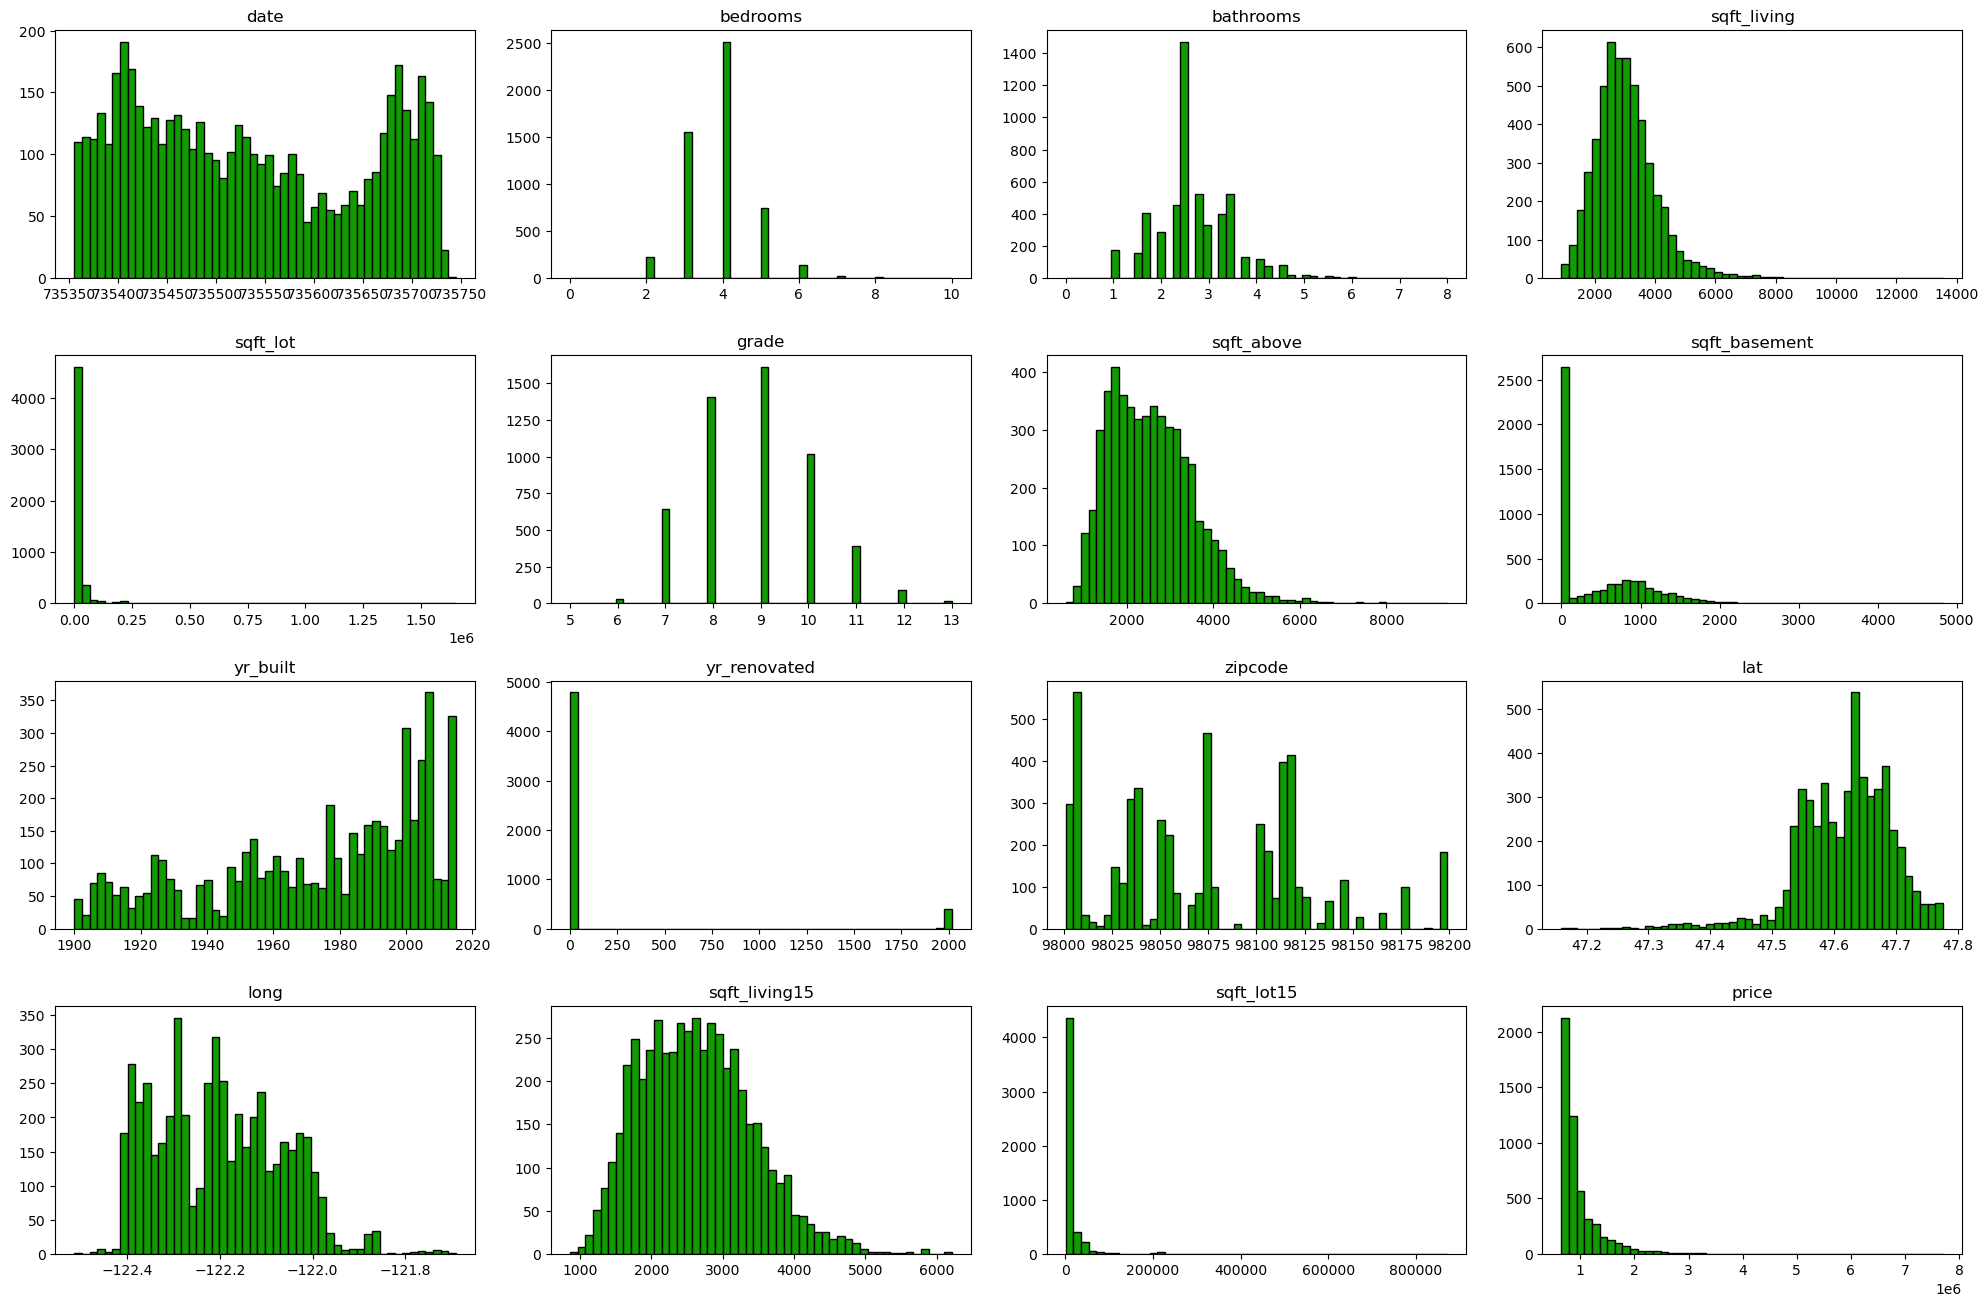

In [24]:
color = '#129B03'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df[numerical].columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df[numerical].iloc[:, i], bins=50, color=color, edgecolor='black')
    ax.set_title(df[numerical].columns[i])

plt.tight_layout()
plt.show()

<h4 style="color: #129B03;">Checking our target distribution</h4>

(array([2.124e+03, 1.237e+03, 5.700e+02, 3.170e+02, 2.690e+02, 1.570e+02,
        1.240e+02, 1.010e+02, 7.000e+01, 4.600e+01, 2.900e+01, 3.200e+01,
        2.800e+01, 2.100e+01, 1.400e+01, 1.000e+01, 1.300e+01, 8.000e+00,
        1.000e+01, 5.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 650100.,  791098.,  932096., 1073094., 1214092., 1355090.,
        1496088., 1637086., 1778084., 1919082., 2060080., 2201078.,
        2342076., 2483074., 2624072., 2765070., 2906068., 3047066.,
        3188064., 3329062., 3470060., 3611058., 3752056., 3893054.,
        4034052., 4175050., 4316048., 4457046., 4598044., 4739042.,
        4880040., 5021038., 5162036.

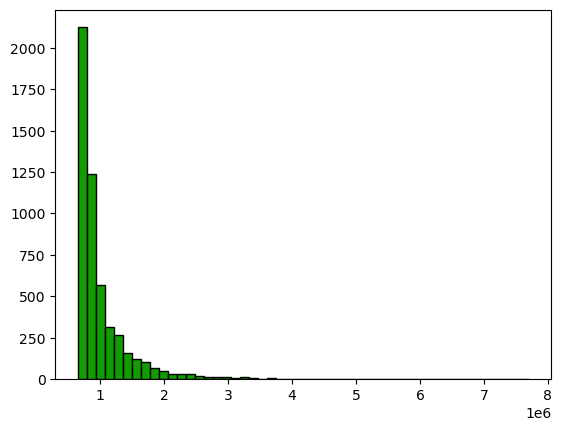

In [25]:
plt.hist(df["price"], bins=50, color="#129B03", edgecolor="black")

<h4 style="color: #129B03;">Checking Outliers</h4>

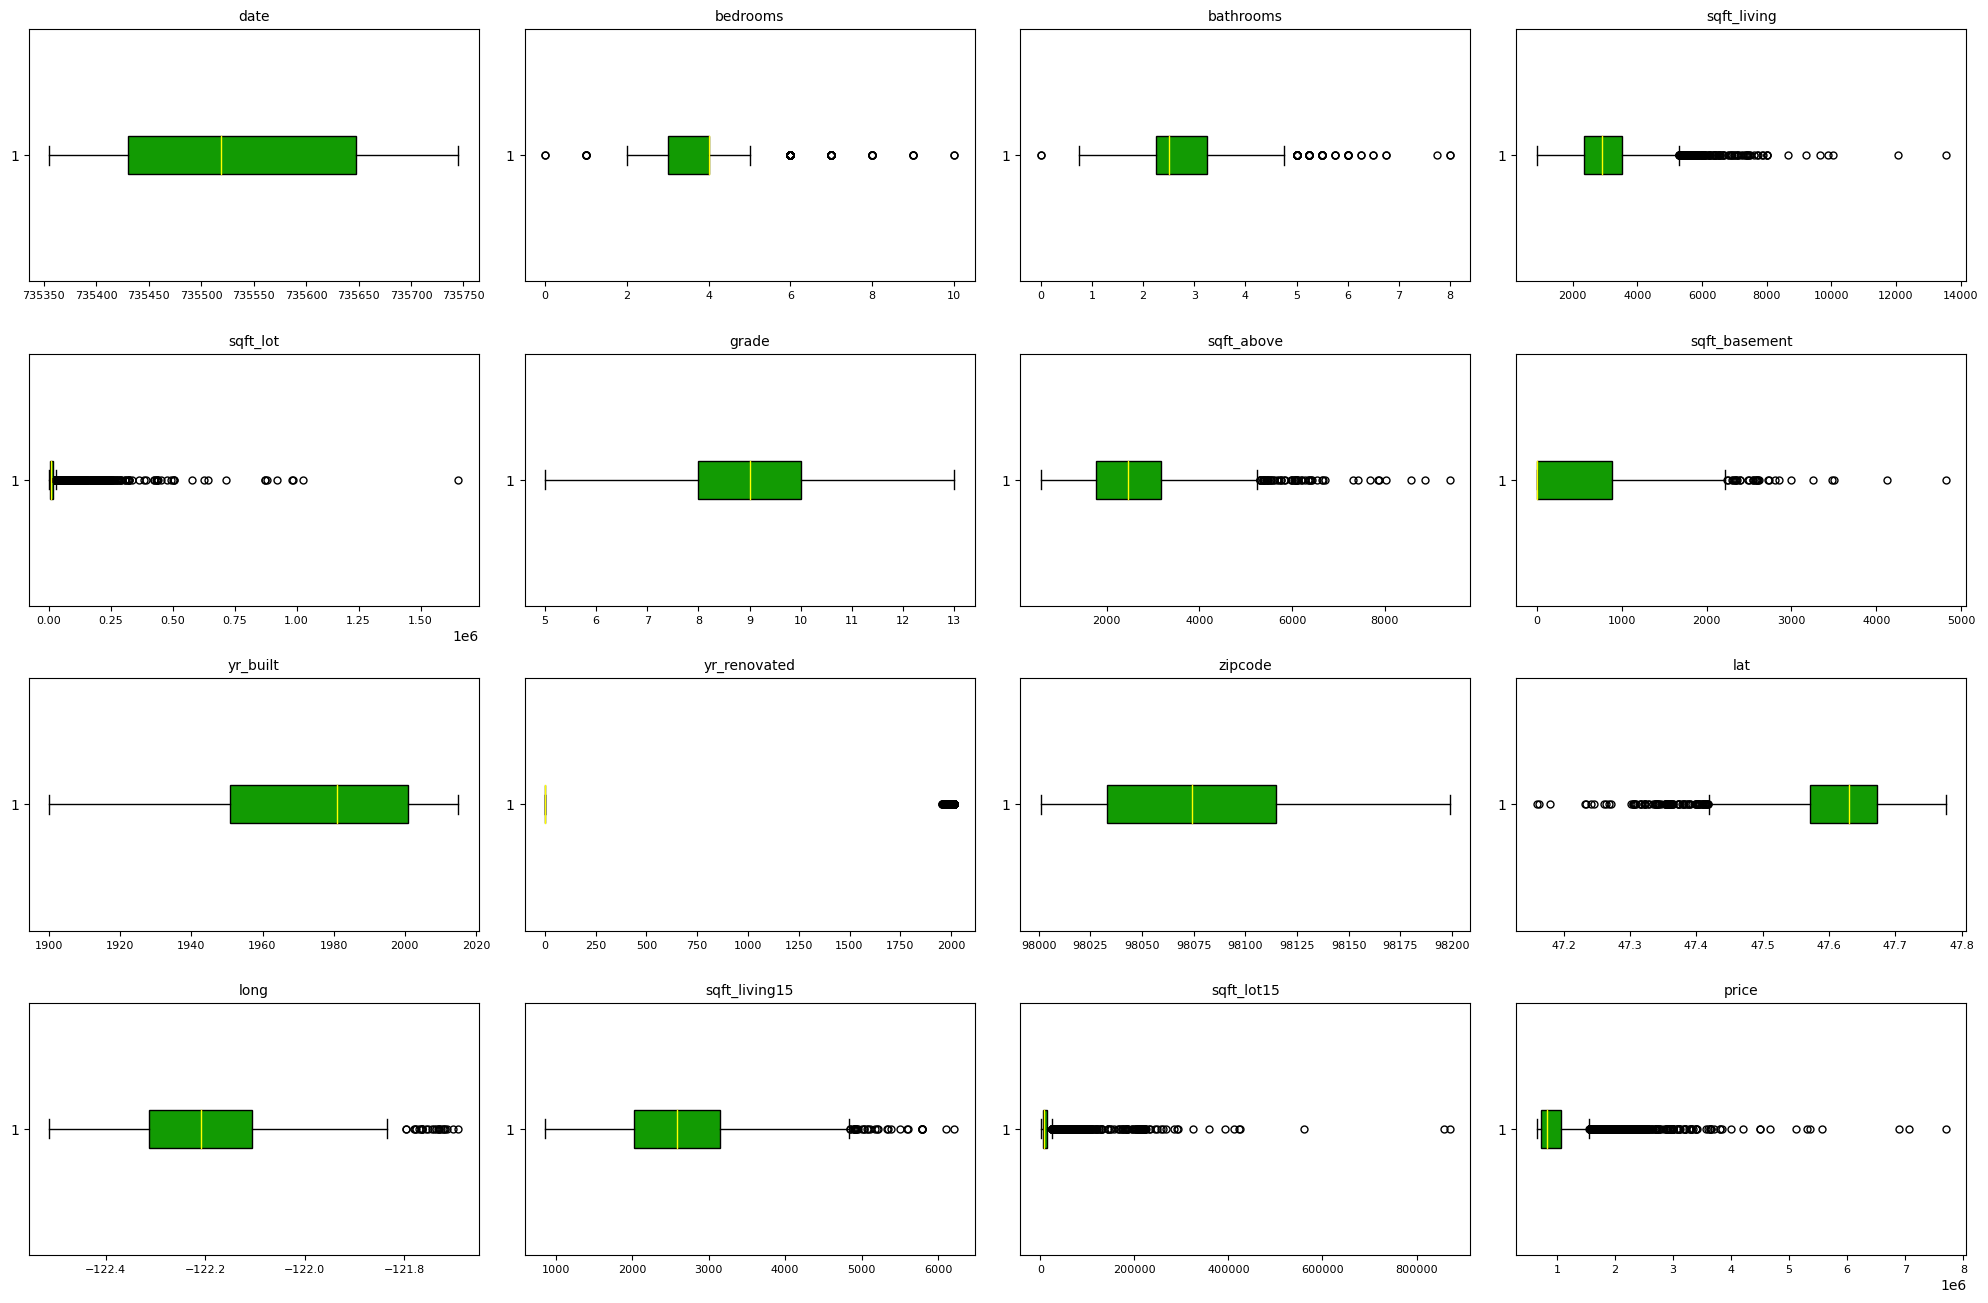

In [26]:
color = '#129B03'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df[numerical].columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df[numerical].iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df[numerical].columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis ticks

plt.tight_layout()
plt.show()

<h4 style="color: #129B03;">Looking for Correlations</h4>

In [27]:
numerical_correlations = round(df.corr(), 2)

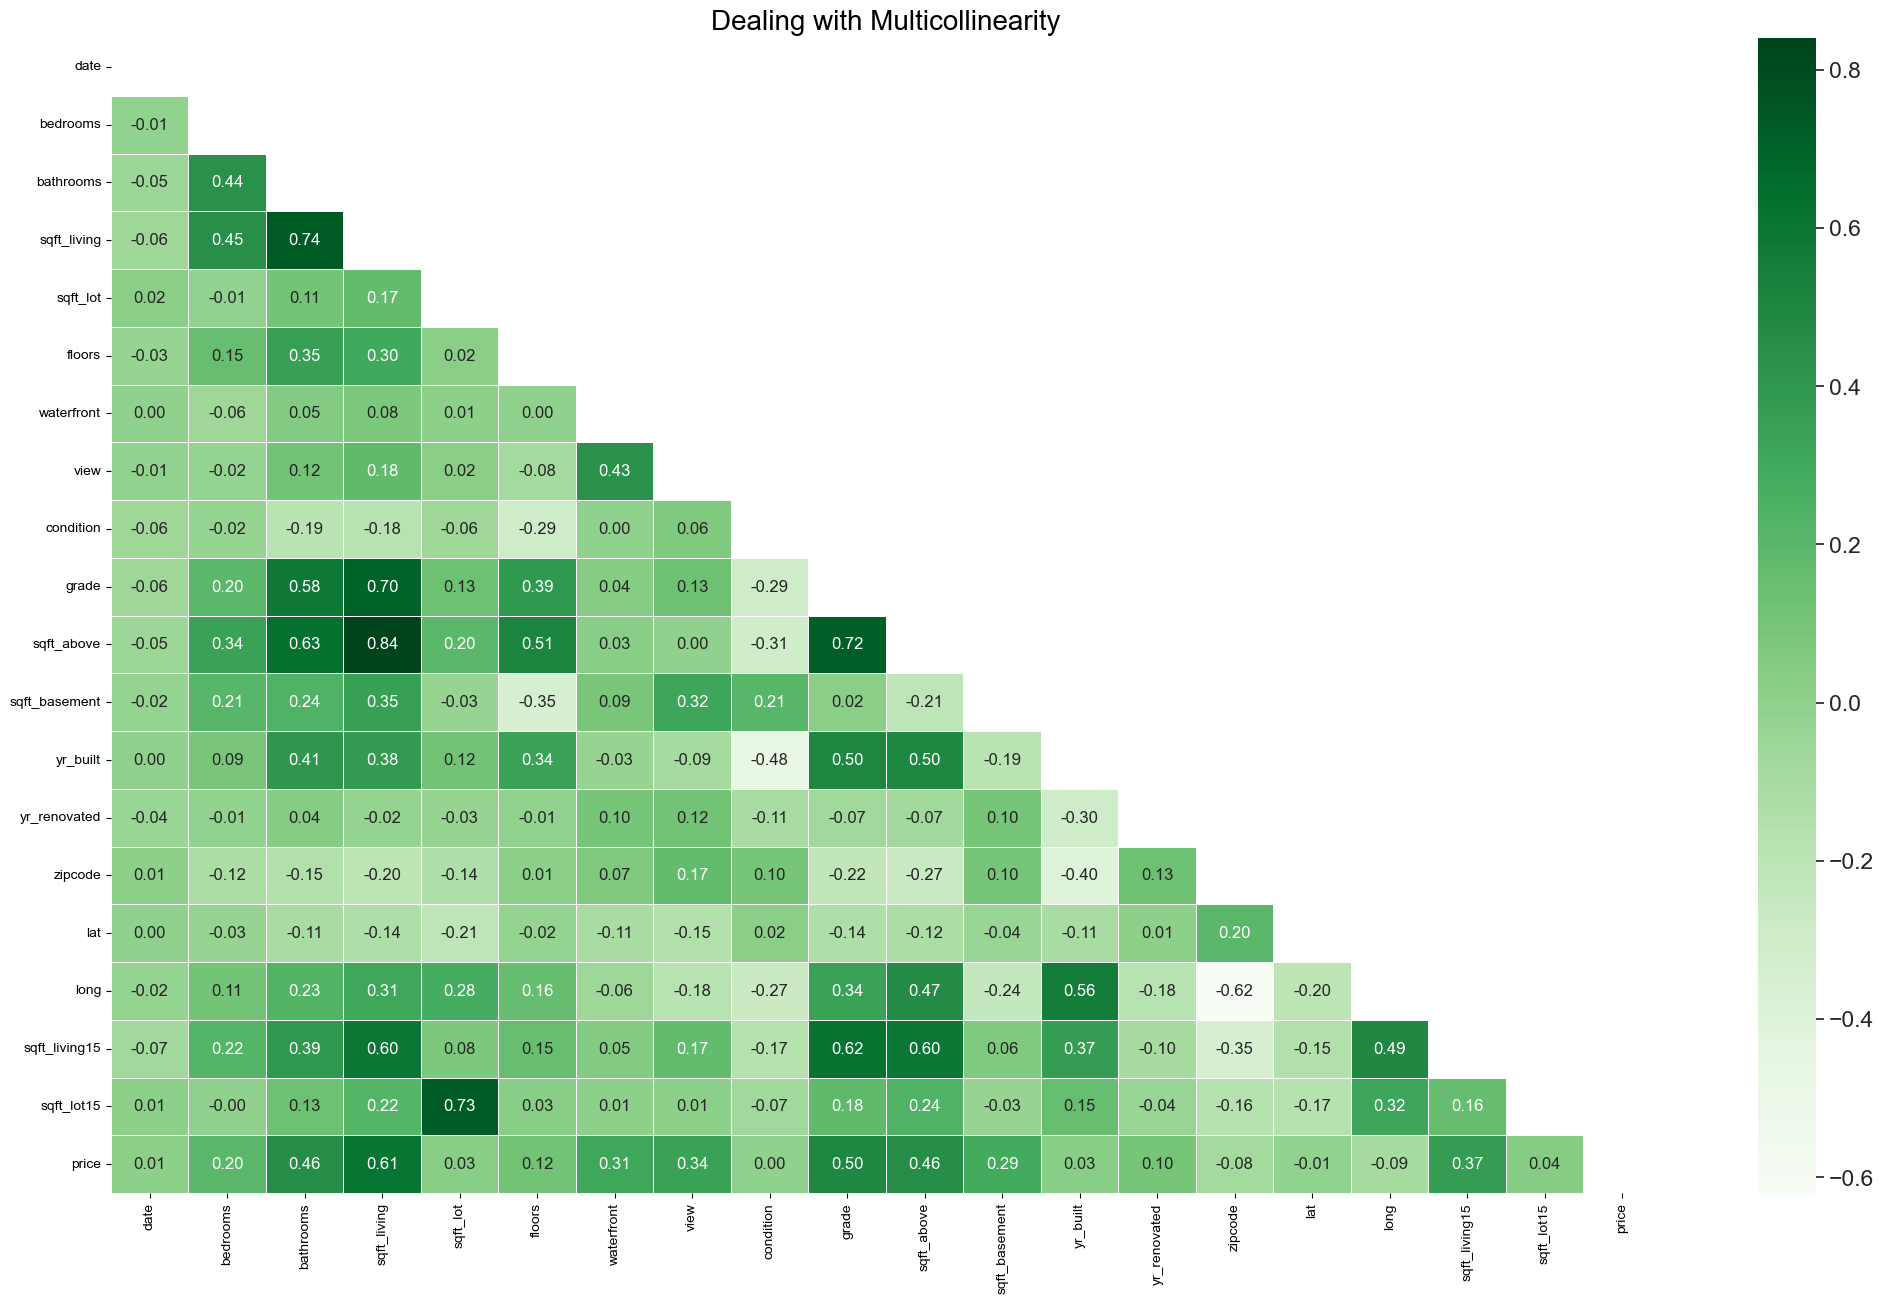

In [28]:
mask = np.zeros_like(numerical_correlations)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)

ax = sns.heatmap(numerical_correlations, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="Greens", fmt=".2f", ax=ax)

ax.set_title("Dealing with Multicollinearity", fontsize=20)

plt.show()

<h4 style="color: #129B03;">Correlaciones de variables numericas específicas con el target</h4>

In [29]:
for column in df.columns:
    _, p_value = st.ttest_rel(df["price"], df[column], nan_policy='omit', alternative='two-sided')
    alpha = 0.05
    if p_value > alpha:
        print(f'We are not able to reject the null hypothesis for column = {column}')
    else:
        print(f'We reject the null hypothesis for column = {column}')


We reject the null hypothesis for column = date
We reject the null hypothesis for column = bedrooms
We reject the null hypothesis for column = bathrooms
We reject the null hypothesis for column = sqft_living
We reject the null hypothesis for column = sqft_lot
We reject the null hypothesis for column = floors
We reject the null hypothesis for column = waterfront
We reject the null hypothesis for column = view
We reject the null hypothesis for column = condition
We reject the null hypothesis for column = grade
We reject the null hypothesis for column = sqft_above
We reject the null hypothesis for column = sqft_basement
We reject the null hypothesis for column = yr_built
We reject the null hypothesis for column = yr_renovated
We reject the null hypothesis for column = zipcode
We reject the null hypothesis for column = lat
We reject the null hypothesis for column = long
We reject the null hypothesis for column = sqft_living15
We reject the null hypothesis for column = sqft_lot15
We reject 

<h4 style="color: #129B03;">Correlaciones de variables categoricas específicas con el target</h4>

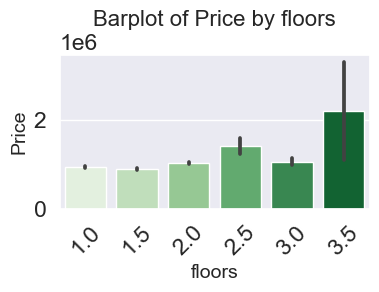

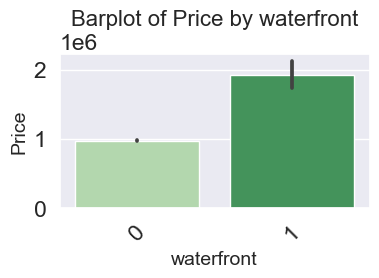

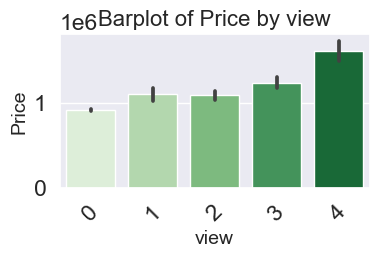

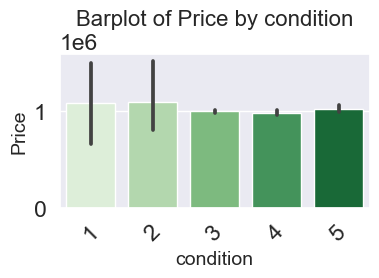

In [30]:
for column in df[categorical]:
    plt.figure(figsize=(4, 2))
    sns.barplot(data=df, x=column, y="price", palette="Greens")
    plt.title(f'Barplot of Price by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


<h4 style="color: #129B03;">Dealing with Multicollinearity</h4>

<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">03 | Data Preprocessing </h1>

<h4 style="color: #129B03;">X-Y Split</h4>

In [31]:
X = df.drop("price", axis=1)
y = df["price"]

<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">04 | Modeling</h1>

<h4 style="color: #129B03;">Train-Test Split</h4>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.


<h4 style="color: #129B03;">Selecting the Model: Linear Regression, Model Validation, Metrics</h4>

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f'20% for test prediction data: {len(predictions)}.')

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

20% for test prediction data: 1042.
R2 =  0.6353
RMSE =  283375.6052
The value of the metric MSE is  80301733595.779
MAE =  195614.2236


<h4 style="color: #129B03;">Selecting the Model: Ridge Regression, Model Validation, Metrics</h4>

In [34]:


ridge = Ridge()
ridge.fit(X_train, y_train)
predictions_ridge = ridge.predict(X_test)

r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6354
RMSE =  283319.5358
The value of the metric MSE is  80269959354.6773
MAE =  195232.0632


<h4 style="color: #129B03;">Selecting the Model: Lasso Regression, Model Validation, Metrics</h4>

In [35]:
lasso = Lasso()
lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6353
RMSE =  283375.4435
The value of the metric MSE is  80301641965.2954
MAE =  195612.3034


<h4 style="color: #129B03;">Selecting the Model: Decision Tree Regression, Model Validation, Metrics</h4>

In [36]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

predictions_tree = tree.predict(X_test)

r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.379
RMSE =  369782.6606
The value of the metric MSE is  136739216070.3877
MAE =  182408.5106


<h4 style="color: #129B03;">Selecting the Model: KNN Regression, Model Validation, Metrics</h4>

In [37]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

predictions_knn = knn.predict(X_test)

r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.3453
RMSE =  379665.322
The value of the metric MSE is  144145756705.8917
MAE =  224315.9891


<h4 style="color: #129B03;">Selecting the Model: XGBoost Regression, Model Validation, Metrics</h4>

In [38]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

predictions_xgb = xgbr.predict(X_test)

r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7397
RMSE =  239391.5675
The value of the metric MSE is  57308322575.2483
MAE =  153684.8902


In [39]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]}

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,6.352873e-01,6.354316e-01,6.352877e-01,3.789607e-01,3.453218e-01,7.397183e-01
RMSE,2.833756e+05,2.833195e+05,2.833754e+05,3.697827e+05,3.796653e+05,2.393916e+05
MSE,8.030173e+10,8.026996e+10,8.030164e+10,1.367392e+11,1.441458e+11,5.730832e+10
MAE,1.956142e+05,1.952321e+05,1.956123e+05,1.824085e+05,2.243160e+05,1.536849e+05


<h4 style="color: #129B03;">Comparing models: Ridge Regression, XGBoost Regression, KNN Regression, Decision Tree Regression,  Ridge Regression</h4>

In [40]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T


Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,6.352873e-01,6.354316e-01,6.352877e-01,3.789607e-01,3.453218e-01,7.397183e-01
RMSE,2.833756e+05,2.833195e+05,2.833754e+05,3.697827e+05,3.796653e+05,2.393916e+05
MSE,8.030173e+10,8.026996e+10,8.030164e+10,1.367392e+11,1.441458e+11,5.730832e+10
MAE,1.956142e+05,1.952321e+05,1.956123e+05,1.824085e+05,2.243160e+05,1.536849e+05


<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">05 | Improving the Model</h1>

<h4 style="color: #129B03;">Normalization with MinMaxScaler, StandardScaler, Log Transform</h4>

In [41]:
scaler1 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled1, y_train)

predictions_xgb_1 = xgbr.predict(X_test_scaled1)

r2_3_7 = r2_score(y_test, predictions_xgb_1)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_1, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_1)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_1)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8213
RMSE =  198350.5257
The value of the metric MSE is  39342931056.6964
MAE =  121476.9409


In [42]:
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

xgbr.fit(X_train_scaled2, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled2)

r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8213
RMSE =  198350.5257
The value of the metric MSE is  39342931056.6964
MAE =  121476.9409


In [43]:
X_train_log3 = np.log1p(X_train)
X_test_log3 = np.log1p(X_test)

xgbr.fit(X_train_log3, y_train)
predictions_xgb_3 = xgbr.predict(X_test_log3)

r2_3_7 = r2_score(y_test, predictions_xgb_3)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_3, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_3)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_3)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.7767
RMSE =  221733.9698
The value of the metric MSE is  49165953372.1083
MAE =  129727.0342


<h4 style="color: #129B03;">Furhter improving the model...</h4>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Dealing with Multicollinearity')

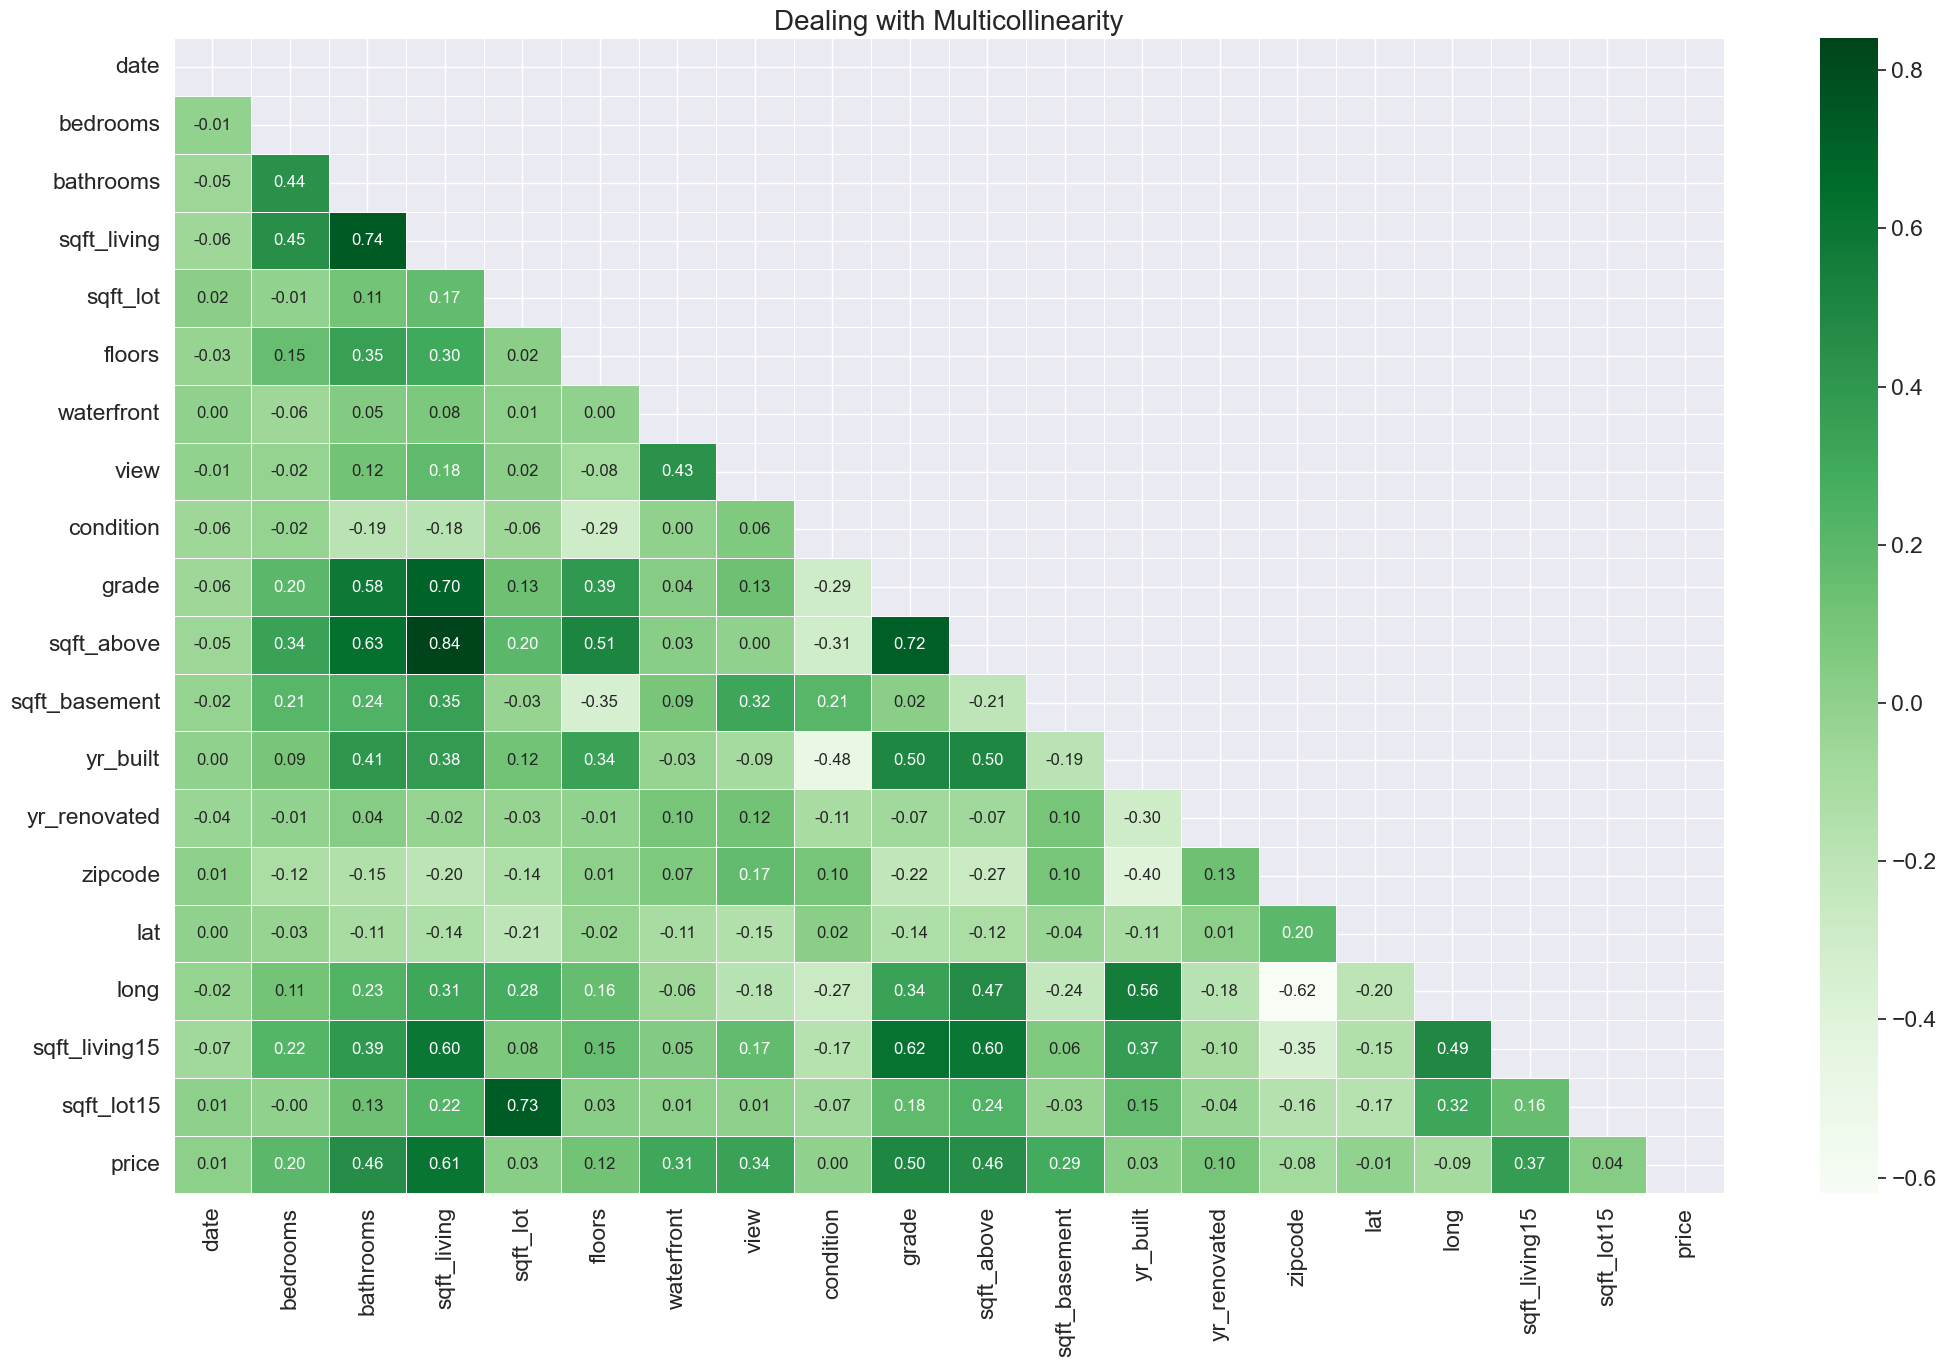

In [45]:
mask = np.zeros_like(numerical_correlations)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)

ax = sns.heatmap(numerical_correlations, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="Greens", fmt=".2f", ax=ax)

ax.set_title("Dealing with Multicollinearity", fontsize=20)


In [46]:
df.columns[:19]

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<div class="alert alert-block alert-info" style="background-color: rgba(18, 155, 3, 0.5); color: black;">
Tip # 1
Primero aplico escalado y luego multicolinealidad y me dan resultados peores que con escalado y multicolinealidad por separado. Segundo aplico multicolinealidad y despues escalado y me dan resultados ..................................... !
</div>


<div class="alert alert-block alert-info" style="background-color: rgba(18, 155, 3, 0.5); color: black;">
Tip # 1
Quito las siguientes variables: drops_multicollinearity = ["price", 'bathrooms', 'yr_renovated', 'sqft_basement']  esto me da un R2 del 81,60806%. No consigo mejorar al quitar ninguna variable más o diferentes !
</div>


In [47]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

drops_multicollinearity = ["price", 'bathrooms']
for column in df.columns[0:19]:
    

In [48]:
lista_columnas = ['date', 'bedrooms', 'sqft_lot', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'condition', 'yr_renovated', 'sqft_above', 'sqft_living15', 'yr_built', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_lot15']
drops_multicollinearity = ["price", 'bathrooms', 'sqft_basement']
for column in lista_columnas:
    drops_multicollinearity.append(column)
    X = df.drop(drops_multicollinearity, axis=1)
    y = df["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'100% of our data: {len(df)}.')
    print(f'80% for training data: {len(X_train)}.')
    print(f'20% for test data: {len(X_test)}.')

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print(f'20% for test prediction data: {len(predictions)}.')

    r2_3 = r2_score(y_test, predictions)
    RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
    MSE_3 = mean_squared_error(y_test, predictions)
    MAE_3 = mean_absolute_error(y_test, predictions)


    ridge = Ridge()
    ridge.fit(X_train, y_train)
    predictions_ridge = ridge.predict(X_test)

    r2_3_2 = r2_score(y_test, predictions_ridge)
    RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
    MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
    MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

    lasso = Lasso()
    lasso.fit(X_train, y_train)

    predictions_lasso = lasso.predict(X_test)

    r2_3_3 = r2_score(y_test, predictions_lasso)
    RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
    MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
    MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)


    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)

    predictions_tree = tree.predict(X_test)

    r2_3_4 = r2_score(y_test, predictions_tree)
    RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
    MSE_3_4 = mean_squared_error(y_test, predictions_tree)
    MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    predictions_knn = knn.predict(X_test)

    r2_3_5 = r2_score(y_test, predictions_knn)
    RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
    MSE_3_5 = mean_squared_error(y_test, predictions_knn)
    MAE_3_5 = mean_absolute_error(y_test, predictions_knn)


    xgbr = xgb.XGBRFRegressor()
    xgbr.fit(X_train, y_train)

    predictions_xgb = xgbr.predict(X_test)

    r2_3_6 = r2_score(y_test, predictions_xgb)
    RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
    MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
    MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

    metrics = {
        'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
        'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
        'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
        'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
        'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]}

    df_metrics = pd.DataFrame(metrics)
    print(column)
    print(df_metrics.set_index("Model").T)
    drops_multicollinearity.remove(column)

100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.
20% for test prediction data: 1042.
date
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.279976e-01  6.281645e-01  6.279978e-01   4.454736e-01   
RMSE        2.861936e+05  2.861294e+05  2.861935e+05   3.494203e+05   
MSE         8.190677e+10  8.187001e+10  8.190670e+10   1.220945e+11   
MAE         1.963146e+05  1.958220e+05  1.963125e+05   1.776855e+05   

Model           KNN       XGBoost  
R²     3.439510e-01  7.460377e-01  
RMSE   3.800626e+05  2.364676e+05  
MSE    1.444476e+11  5.591693e+10  
MAE    2.259308e+05  1.527594e+05  
100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.
20% for test prediction data: 1042.
bedrooms
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.330684e-01  6.332014e-01  6.330684e-01   4.294228e-01   
RMSE        2.842363e+05  2.841848e+05  2.842363e+05   3.544412e+05   
MSE      

sqft_basement
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.328774e-01  6.330043e-01  6.328775e-01   4.715145e-01   
RMSE        2.843103e+05  2.842611e+05  2.843102e+05   3.411171e+05   
MSE         8.083234e+10  8.080438e+10  8.083230e+10   1.163609e+11   
MAE         1.959510e+05  1.956251e+05  1.959494e+05   1.764937e+05   

Model           KNN       XGBoost  
R²     3.415702e-01  7.436465e-01  
RMSE   3.807516e+05  2.375782e+05  
MSE    1.449718e+11  5.644342e+10  
MAE    2.273029e+05  1.528503e+05  
100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.
20% for test prediction data: 1042.
zipcode
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.097728e-01  6.095199e-01  6.097712e-01   4.255585e-01   
RMSE        2.931202e+05  2.932152e+05  2.931208e+05   3.556394e+05   
MSE         8.591945e+10  8.597513e+10  8.591980e+10   1.264794e+11   
MAE         2.010696e+05  2.008976e+05  2.01

X_train_scaled1 X_test_scaled1

In [60]:
lista_columnas = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
drops_multicollinearity = ["price", 'sqft_lot']
for column in lista_columnas:
    drops_multicollinearity.append(column)
    X = df.drop(drops_multicollinearity, axis=1)
    y = df["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'100% of our data: {len(df)}.')
    print(f'80% for training data: {len(X_test_scaled1)}.')
    print(f'20% for test data: {len(X_test_scaled1)}.')

    model = LinearRegression()
    model.fit(X_train_scaled1, y_train)

    predictions = model.predict(X_test_scaled1)

    print(f'20% for test prediction data: {len(predictions)}.')

    r2_3 = r2_score(y_test, predictions)
    RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
    MSE_3 = mean_squared_error(y_test, predictions)
    MAE_3 = mean_absolute_error(y_test, predictions)


    ridge = Ridge()
    ridge.fit(X_train_scaled1, y_train)
    predictions_ridge = ridge.predict(X_test_scaled1)

    r2_3_2 = r2_score(y_test, predictions_ridge)
    RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
    MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
    MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

    lasso = Lasso()
    lasso.fit(X_train_scaled1, y_train)

    predictions_lasso = lasso.predict(X_test_scaled1)

    r2_3_3 = r2_score(y_test, predictions_lasso)
    RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
    MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
    MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)


    tree = DecisionTreeRegressor()
    tree.fit(X_train_scaled1, y_train)

    predictions_tree = tree.predict(X_test_scaled1)

    r2_3_4 = r2_score(y_test, predictions_tree)
    RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
    MSE_3_4 = mean_squared_error(y_test, predictions_tree)
    MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

    knn = KNeighborsRegressor()
    knn.fit(X_train_scaled1, y_train)

    predictions_knn = knn.predict(X_test_scaled1)

    r2_3_5 = r2_score(y_test, predictions_knn)
    RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
    MSE_3_5 = mean_squared_error(y_test, predictions_knn)
    MAE_3_5 = mean_absolute_error(y_test, predictions_knn)


    xgbr = xgb.XGBRFRegressor()
    xgbr.fit(X_train_scaled1, y_train)

    predictions_xgb = xgbr.predict(X_test_scaled1)

    r2_3_6 = r2_score(y_test, predictions_xgb)
    RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
    MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
    MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

    metrics = {
        'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
        'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
        'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
        'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
        'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]}

    df_metrics = pd.DataFrame(metrics)
    print(column)
    print(df_metrics.set_index("Model").T)
    drops_multicollinearity.remove(column)

100% of our data: 5207.
80% for training data: 1042.
20% for test data: 1042.
20% for test prediction data: 1042.
date
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.312515e-01  6.324952e-01  6.312602e-01   4.575023e-01   
RMSE        2.849391e+05  2.844582e+05  2.849358e+05   3.456097e+05   
MSE         8.119032e+10  8.091649e+10  8.118841e+10   1.194461e+11   
MAE         1.966119e+05  1.953255e+05  1.966035e+05   1.771765e+05   

Model           KNN       XGBoost  
R²     6.439256e-01  7.479284e-01  
RMSE   2.799996e+05  2.355857e+05  
MSE    7.839977e+10  5.550064e+10  
MAE    1.641500e+05  1.519552e+05  
100% of our data: 5207.
80% for training data: 1042.
20% for test data: 1042.
20% for test prediction data: 1042.
bedrooms
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.312515e-01  6.324952e-01  6.312602e-01   4.611699e-01   
RMSE        2.849391e+05  2.844582e+05  2.849358e+05   3.444395e+05   
MSE      

zipcode
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.312515e-01  6.324952e-01  6.312602e-01   4.545029e-01   
RMSE        2.849391e+05  2.844582e+05  2.849358e+05   3.465638e+05   
MSE         8.119032e+10  8.091649e+10  8.118841e+10   1.201065e+11   
MAE         1.966119e+05  1.953255e+05  1.966035e+05   1.762366e+05   

Model           KNN       XGBoost  
R²     6.439256e-01  7.479284e-01  
RMSE   2.799996e+05  2.355857e+05  
MSE    7.839977e+10  5.550064e+10  
MAE    1.641500e+05  1.519552e+05  
100% of our data: 5207.
80% for training data: 1042.
20% for test data: 1042.
20% for test prediction data: 1042.
lat
Model  Linear Regression         Ridge         Lasso  Decision Tree  \
R²          6.312515e-01  6.324952e-01  6.312602e-01   4.702808e-01   
RMSE        2.849391e+05  2.844582e+05  2.849358e+05   3.415151e+05   
MSE         8.119032e+10  8.091649e+10  8.118841e+10   1.166325e+11   
MAE         1.966119e+05  1.953255e+05  1.966035e+05  

In [50]:
X = df.drop(["price", 'bathrooms', 'yr_renovated', 'sqft_basement'], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.


In [51]:
scaler1 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled1, y_train)

predictions_xgb_1 = xgbr.predict(X_test_scaled1)

r2_3_7 = r2_score(y_test, predictions_xgb_1)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_1, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_1)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_1)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

xgbr.fit(X_train_scaled2, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled2)

r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

X_train_log3 = np.log1p(X_train)
X_test_log3 = np.log1p(X_test)

xgbr.fit(X_train_log3, y_train)
predictions_xgb_3 = xgbr.predict(X_test_log3)

r2_3_7 = r2_score(y_test, predictions_xgb_3)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_3, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_3)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_3)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8249
RMSE =  196343.363
The value of the metric MSE is  38550716177.1084
MAE =  119383.332
R2 =  0.8249
RMSE =  196343.363
The value of the metric MSE is  38550716177.1084
MAE =  119383.332
R2 =  0.796
RMSE =  211953.2791
The value of the metric MSE is  44924192510.7385
MAE =  127813.1195


In [52]:
scaler4 = preprocessing.RobustScaler()

X_train_scaled4 = scaler4.fit_transform(X_train)
X_test_scaled4 = scaler4.transform(X_test)

xgbr.fit(X_train_scaled4, y_train)
predictions_xgb_4 = xgbr.predict(X_test_scaled4)


r2_3_7 = r2_score(y_test, predictions_xgb_4)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_4, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_4)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_4)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8249
RMSE =  196343.363
The value of the metric MSE is  38550716177.1084
MAE =  119383.332


<div class="alert alert-block alert-info" style="background-color: rgba(18, 155, 3, 0.5); color: black;">
Tip # 1
Primero aplico escalado y luego multicolinealidad y me dan resultados peores que con escalado y multicolinealidad por separado. Segundo aplico multicolinealidad y despues escalado y me dan resultados mejores con un 88,85% de R2 !
</div>


<div class="alert alert-block alert-info" style="background-color: rgba(18, 155, 3, 0.5); color: black;">
Tip # 1
DESPUES DE APLICAR: NORMALIZACION EN 2 VARIABLES sqft_living y sqft-living15; MULTICOLINEALIDAD EN 3 VARIABLES bathrooms, yr_renovated, sqft_basement; ESCALADO; OUTLIERS EN el target price. EL MAXIMO ALCANZADO EN R2 ES DE 88.85%!
</div>

In [53]:
series_pred = pd.Series(predictions_xgb_4, name='predictions')
series_y_test = pd.Series(y_test, name='overall')
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df

,overall,predictions
0,719950.0,8.125481e+05
1,960000.0,8.872973e+05
2,875000.0,8.307626e+05
3,731500.0,7.228961e+05
4,657000.0,6.859904e+05
...,...,...
1037,712500.0,9.760251e+05
1038,1310000.0,1.442917e+06
1039,950000.0,8.123004e+05
1040,1325000.0,1.067249e+06


In [54]:
comparison_df["differences"] = comparison_df["overall"] - comparison_df["predictions"]

In [55]:
comparison_df

,overall,predictions,differences
0,719950.0,8.125481e+05,-92598.1250
1,960000.0,8.872973e+05,72702.6875
2,875000.0,8.307626e+05,44237.4375
3,731500.0,7.228961e+05,8603.9375
4,657000.0,6.859904e+05,-28990.3750
...,...,...,...
1037,712500.0,9.760251e+05,-263525.1250
1038,1310000.0,1.442917e+06,-132916.8750
1039,950000.0,8.123004e+05,137699.5625
1040,1325000.0,1.067249e+06,257750.8750


In [61]:
df5 = pd.DataFrame(comparison_df["differences"].describe().round(2))
df5

,differences
count,1042.00
mean,-5412.18
std,196363.00
min,-1135603.25
25%,-78057.31
50%,-8588.16
75%,53584.36
max,1708963.25


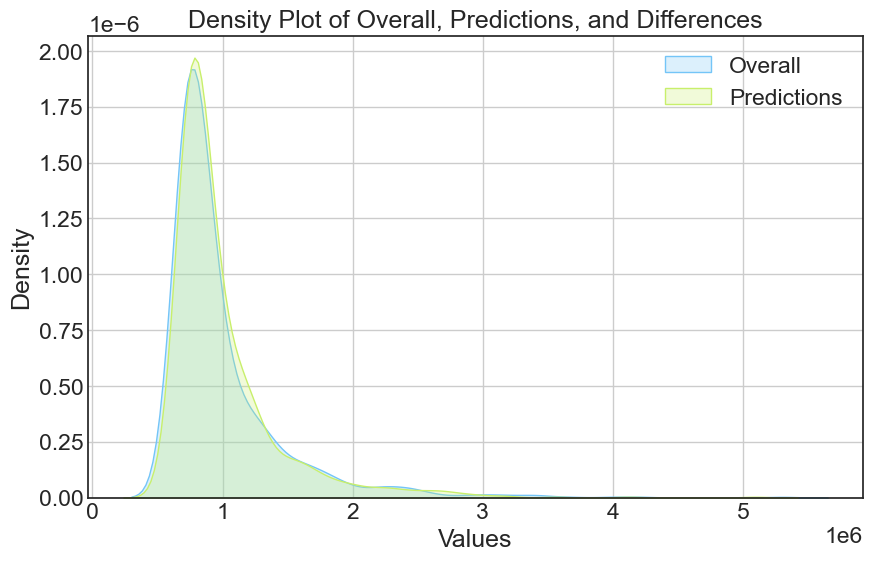

In [56]:
plt.style.use('seaborn-white')

# Crear una figura y ejes de subtrama
plt.figure(figsize=(10, 6))

# Tramar las distribuciones de densidad
sns.kdeplot(data=comparison_df['overall'], label='Overall', color="#74C5F7", shade=True)
sns.kdeplot(data=comparison_df['predictions'], label='Predictions', color="#C8EF6B", shade=True)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Overall, Predictions, and Differences')
plt.legend()
plt.grid(True)
plt.show()

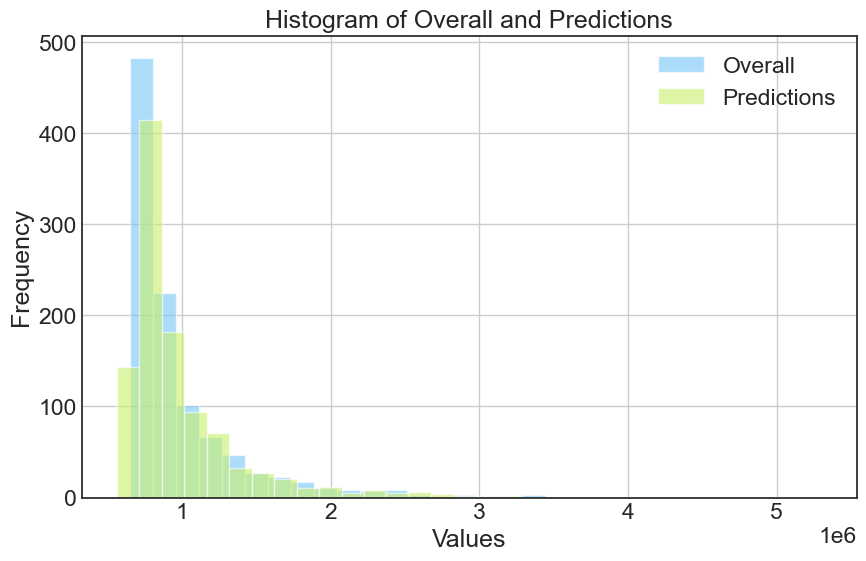

In [57]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10, 6))
plt.hist(comparison_df['overall'], bins=30, alpha=0.6, label='Overall', color= "#74C5F7")
plt.hist(comparison_df['predictions'], bins=30, alpha=0.6, label='Predictions', color= "#C8EF6B")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Overall and Predictions')
plt.legend()
plt.grid(True)
plt.show()

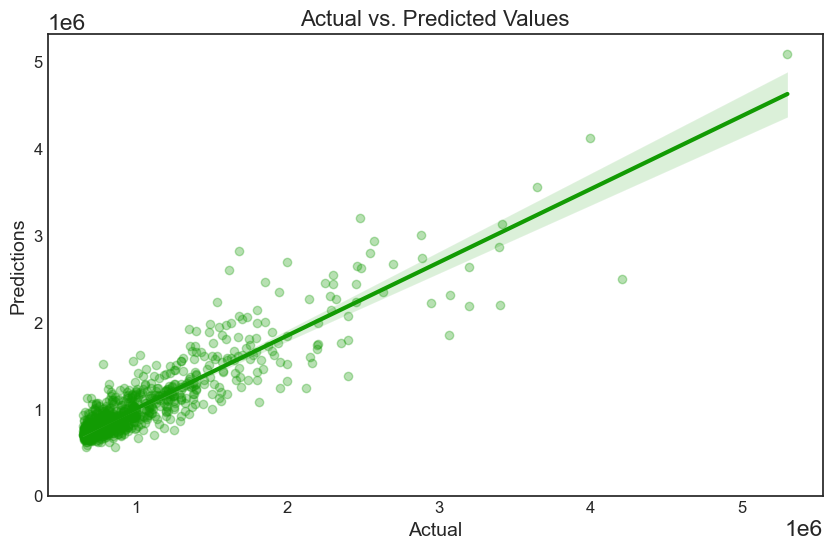

In [58]:
scatter_color = "#129B03"
line_color = "#129B03"

plt.figure(figsize=(10, 6))

sns.regplot(x='overall', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.3},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h1 style="color: #129B03; text-shadow: 2px 2px 4px #000000; border: 1px solid #000000; font-size: 36px;">06 | Reporting</h1>